In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

import sys
# sys.path.append('../')
os.chdir("/mnt/data/jarvislam1999/Real-time-GesRec/")

from ems_tester import EMSTester

In [2]:
expr_name = 'ems22.8'

tester = EMSTester(root_path='/mnt/data/jarvislam1999/Real-time-GesRec',
                  video_path='/mnt/data/yxchen/gesture-datasets/ems/',
                  annotation_path='annotation_ems/%s.json' % expr_name,
                  result_path='results/%s_test' % expr_name,
                  model_path='results/%s/save_30.pth' %'ems21.3')


Namespace(annotation_path='/mnt/data/jarvislam1999/Real-time-GesRec/annotation_ems/ems22.8.json', arch='resnext-101', batch_size=1, begin_epoch=1, checkpoint=1, crop_position_in_test='c', dampening=0.9, dataset='ems', ft_begin_index=0, initial_scale=1.0, learning_rate=0.1, lr_patience=10, lr_steps=[10, 25, 50, 80, 100], manual_seed=1, mean=[114.7748, 107.7354, 99.475], mean_dataset='activitynet', modality='RGB', model='resnext', model_depth=101, momentum=0.9, n_classes=400, n_epochs=200, n_finetune_classes=4, n_scales=5, n_threads=1, n_val_samples=1, nesterov=False, no_cuda=False, no_hflip=False, no_mean_norm=False, no_softmax_in_test=False, no_train=False, no_val=False, norm_value=1, optimizer='sgd', pretrain_path='', resnet_shortcut='B', resnext_cardinality=32, result_path='/mnt/data/jarvislam1999/Real-time-GesRec/results/ems22.8_test', resume_path='/mnt/data/jarvislam1999/Real-time-GesRec/results/ems21.3/save_30.pth', root_path='/mnt/data/jarvislam1999/Real-time-GesRec', sample_dura

In [3]:
y_pred, y_true, test_data = tester.test()

[INFO]: EMS Dataset - testing is loading...
dataset loading [0/400]
loading checkpoint /mnt/data/jarvislam1999/Real-time-GesRec/results/ems21.3/save_30.pth
Batch time: 0
Batch time: 0.19390626311302184
-----Evaluation is finished------
Overall Prec@1 95.75000%


0 wrist_right : 93.46%
1 supination : 87.80%
2 wrist_left : 100.00%
3 pronation : 100.00%
Normalized confusion matrix
Confusion matrix plotted


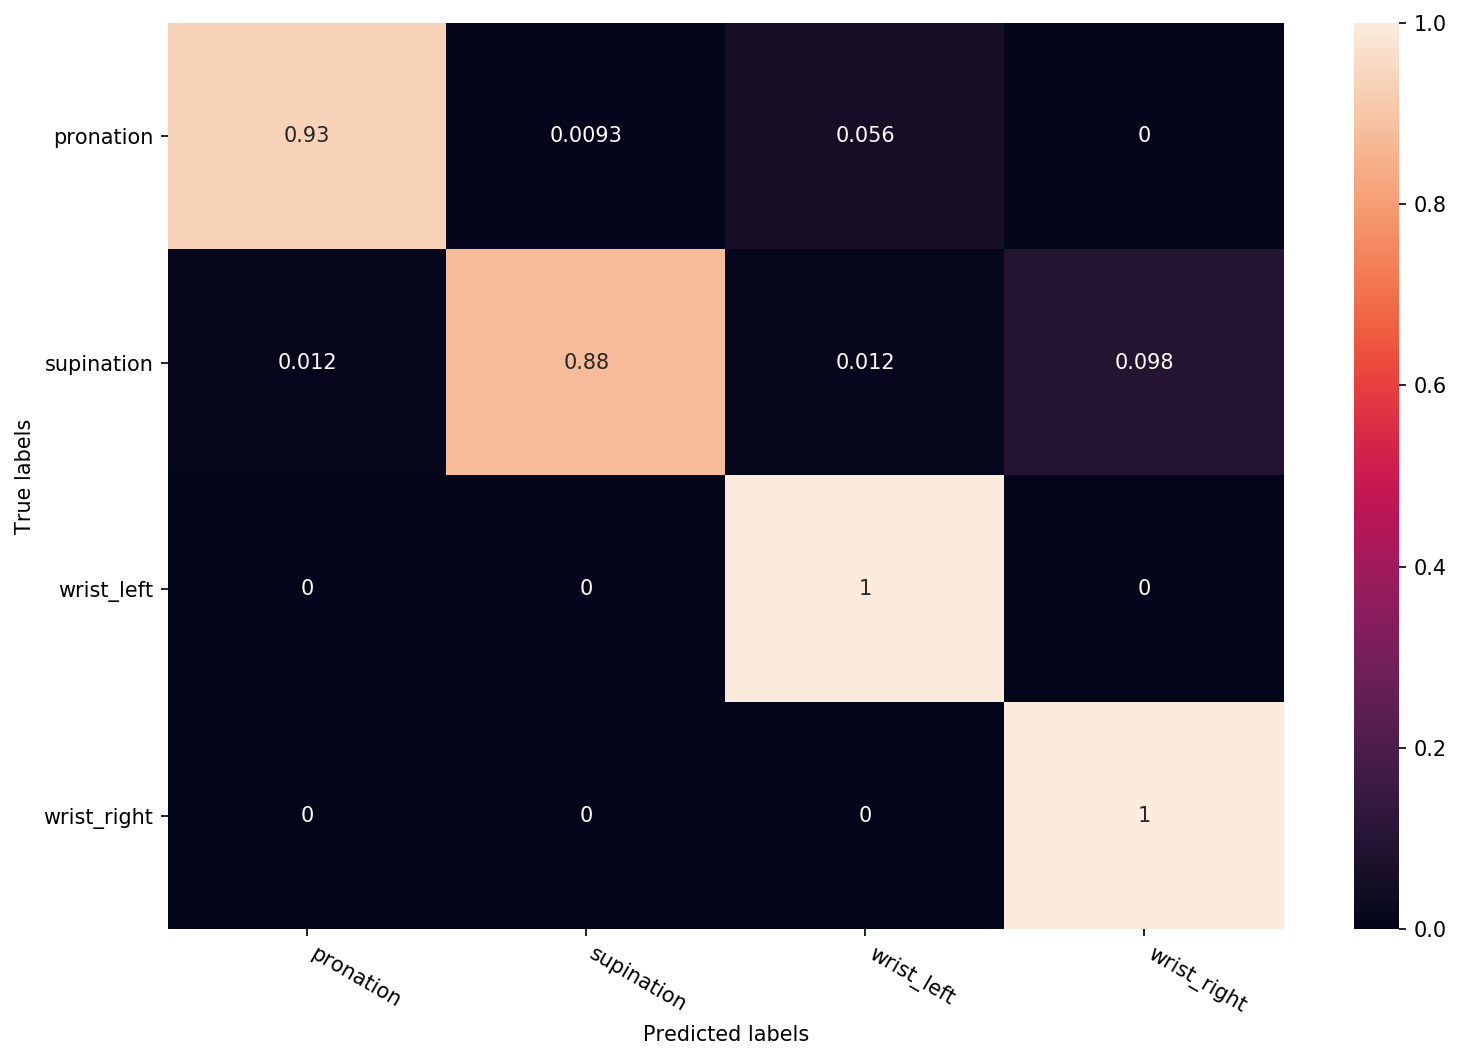

In [4]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

def plot_cm(cm, labels, classes=None, normalize = True):
    import seaborn as sns
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax= plt.subplots(figsize=(12,8), dpi=150)
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.xticks(rotation=-30, ha="left")
    plt.yticks(rotation='horizontal')

    print("Confusion matrix plotted")
    plt.show()

name_map = test_data.class_names
labels = [name_map[k] for k in test_data.class_names.keys()]
labels.sort(key=lambda item: (item.startswith('human_'), item))
y_true_name = [name_map[k] for k in y_true]
y_pred_name = [name_map[k] for k in y_pred]
cf = confusion_matrix(y_true_name, y_pred_name, labels).astype(float)

cls_cnt = cf.sum(axis=1)
cls_hit = np.diag(cf)
cls_acc = cls_hit / cls_cnt
    
for i in range(len(test_data.class_names)):
    print(i, test_data.class_names[i], ': {:.02f}%'.format(cls_acc[i]*100))
    
plot_cm(cf, labels)

import matplotlib.pyplot as plt

def plot_loss_acc(exp):
    with open('results/{}/train.log'.format(exp), 'r') as f:
        cols = f.readline().strip().split('\t')
        log = {}
        for c in cols:
            log[c] = []

        for row in f.readlines():
            for i, c in enumerate(row.strip().split('\t')):
                log[cols[i]].append(float(c))

    plt.subplots(dpi=200)
    plt.plot(log['epoch'], log['loss'])
    plt.plot(log['epoch'], log['acc'])
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

plot_loss_acc(expr_name)